## Prediction of Heart Disease using Heart Dataset

#### About
##### There is a given dataset that includes clinical parameters about a patient. Using these parameters we see if we can predict the heart disease.

## Code

In [2]:
#imporing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
dt=pd.read_csv("heartdt.csv") #intializing dataset

In [4]:
type(dt) #displaying type of dataset

pandas.core.frame.DataFrame

In [5]:
dt.shape #displaying shape of dataset

(303, 14)

In [6]:
dt.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dt.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###### No missing Values

In [8]:
dt.info() #displaying  indextype, column dtypes, non null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


###### Understanding columns that is the column description 

In [9]:
info = ["Age","1= Male | 0= Female","Chest Pain Type: 1= Typical Angina | 2= Atypical Angina | 3= Non-Anginal Pain | 4= Asymptomatic","Resting Blood Pressure","Serum Cholestoral in mg/dl","Fasting Blood Sugar > 120 mg/dl","Resting Electrocardiographic Results (values 0,1,2)"," Maximum Heart Rate Achieved","Exercise Induced Angina","Oldpeak = ST Depression Induced by Exercise Relative to Rest","The Slope of the Peak Exercise ST Segment","Number of Major Vessels (0-3) colored by Flouroscopy","Thal= 3 is Normal | 6 is Fixed Defect | 7 is Reversable Defect"]

for i in range(len(info)):
    print(dt.columns[i]+":\t\t\t"+info[i])

age:			Age
sex:			1= Male | 0= Female
cp:			Chest Pain Type: 1= Typical Angina | 2= Atypical Angina | 3= Non-Anginal Pain | 4= Asymptomatic
trtbps:			Resting Blood Pressure
chol:			Serum Cholestoral in mg/dl
fbs:			Fasting Blood Sugar > 120 mg/dl
restecg:			Resting Electrocardiographic Results (values 0,1,2)
thalachh:			 Maximum Heart Rate Achieved
exng:			Exercise Induced Angina
oldpeak:			Oldpeak = ST Depression Induced by Exercise Relative to Rest
slp:			The Slope of the Peak Exercise ST Segment
caa:			Number of Major Vessels (0-3) colored by Flouroscopy
thall:			Thal= 3 is Normal | 6 is Fixed Defect | 7 is Reversable Defect


## Exploratory Data Analysis (EDA)

### 'Output' Feature

In [10]:
dt["output"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [11]:
dt["output"].unique() ##value are 1s and 0s 

array([1, 0], dtype=int64)

In [12]:
print(dt.corr()["output"].abs().sort_values(ascending=False)) ##checking the correlation between different columns

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


##### From this we know that the columns are relatively correlated with the output but in this there is a vlue called fbs that is weakly correlated 

In [13]:
dt.output.value_counts()

1    165
0    138
Name: output, dtype: int64

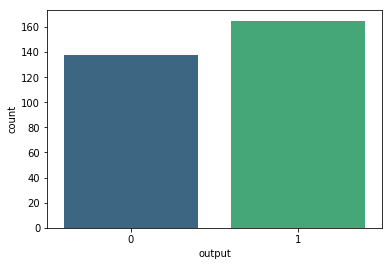

In [14]:
sns.countplot(x="output", data=dt, palette="viridis")
plt.show()

In [15]:
countNoDisease = len(dt[dt.output == 0])
countHaveDisease = len(dt[dt.output == 1])
print("The percentage of patients that don't have heart disease = {:.2f}%".format((countNoDisease / (len(dt.output))*100)))
print("The percentage of patients that have heart disease = {:.2f}%".format((countHaveDisease / (len(dt.output))*100)))

The percentage of patients that don't have heart disease = 45.54%
The percentage of patients that have heart disease = 54.46%


### 'Sex' Feature

In [16]:
dt["sex"].unique() ##value are 1s and 0s that is male and female

array([1, 0], dtype=int64)

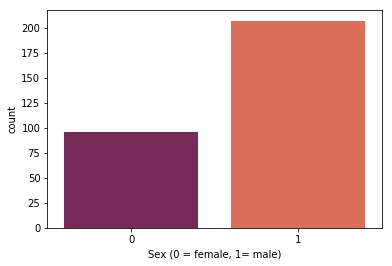

In [17]:
sns.countplot(x='sex', data=dt, palette="rocket") #checking for number of patients
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [18]:
countFemale = len(dt[dt.sex == 0])
countMale = len(dt[dt.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(dt.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(dt.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


##### from this we know that the percentage of male patients is more as compared to the percentage fo female patients

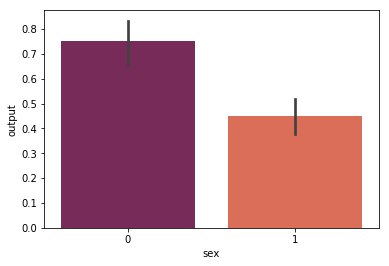

In [19]:
y = dt["output"]

sns.barplot(dt["sex"],y,  palette="rocket") #checking for disease among 'sex' feature

##### but alternatively when we plot a bar plot for the output and the sex features, we see that female patients are more likely to come across a heart disease as compared to male patients  

### 'Chest Pain Type' (CP) Feature 

In [20]:
dt["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

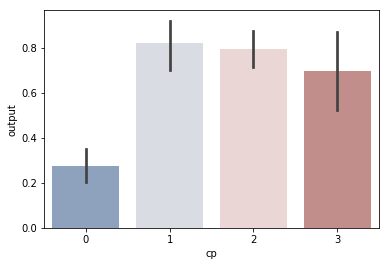

In [21]:
sns.barplot(dt["cp"],y, palette= "vlag") #plotting barplot for CP to know the possiblity of heart disease

##### when we plot the cp we understand that the patients with typical angina are less likely to have heart disease

### 'Fasting Blood Sugar' (FBS)  Feature 

In [22]:
dt["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [23]:
dt["fbs"].unique()

array([1, 0], dtype=int64)

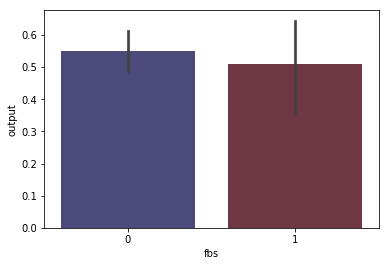

In [24]:
sns.barplot(dt["fbs"],y, palette = "icefire" )

##### as we see this feature is not very important

### 'Resting Electrocardiographic Results' (restecg) Feature

In [25]:
dt["restecg"].unique()

array([0, 1, 2], dtype=int64)

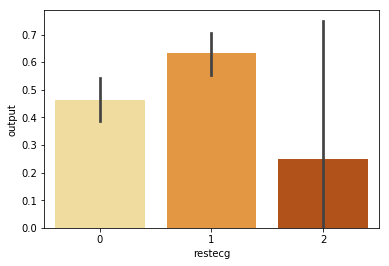

In [26]:
sns.barplot(dt["restecg"],y, palette="YlOrBr")

##### from this we know that people with restecg 2 are least likely to have heart disease and 1 and 0 are likely to have heart disease

### Exercise induced angina (Exng) Feature

In [27]:
dt["exng"].unique()

array([0, 1], dtype=int64)

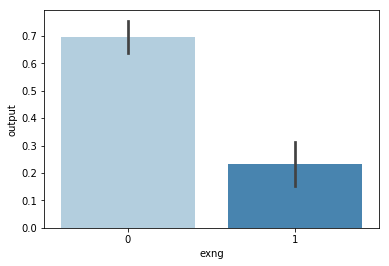

In [28]:
sns.barplot(dt["exng"],y,palette= "Blues")

##### patients with exercise induced angina = 1 are less likely to have heart disease

### Slope (slp) Feature

In [29]:
dt["slp"].unique()

array([0, 2, 1], dtype=int64)

Text(0, 0.5, 'Frequency')

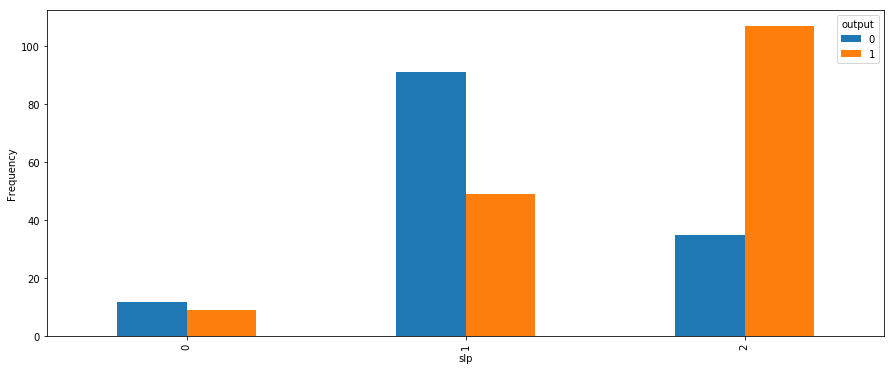

In [30]:
pd.crosstab(dt.slp,dt.output).plot(kind="bar",figsize=(15,6))
plt.ylabel('Frequency')

##### we see that 2 causes more heart pain than slope 1 and 0 

### Number of major vessels (0 - 3) colored by flouroscopy (Caa) Feature 

In [31]:
dt["caa"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

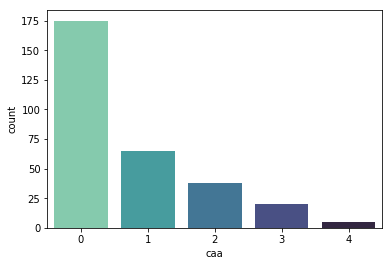

In [32]:
sns.countplot(dt["caa"], palette = "mako_r")

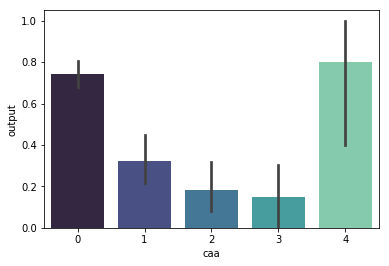

In [33]:
sns.barplot(dt["caa"],y, palette = "mako")

##### caa= 4 is likely to have heart disease while caa=0 has large number of patients

### Analysing the 'thal' feature

In [34]:
dt["thall"].unique()

array([1, 2, 3, 0], dtype=int64)

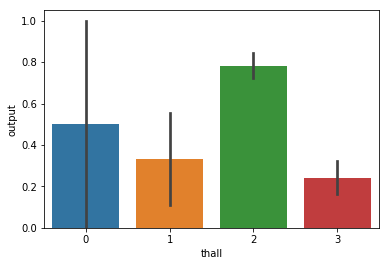

In [35]:
sns.barplot(dt["thall"],y)

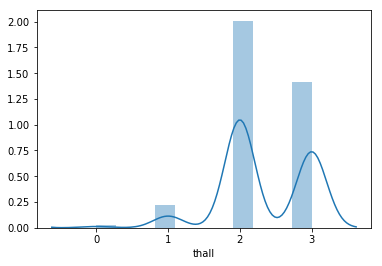

In [36]:
sns.distplot(dt["thall"])

##### from these two graphs we see that thall= 2 is likely to have the disease

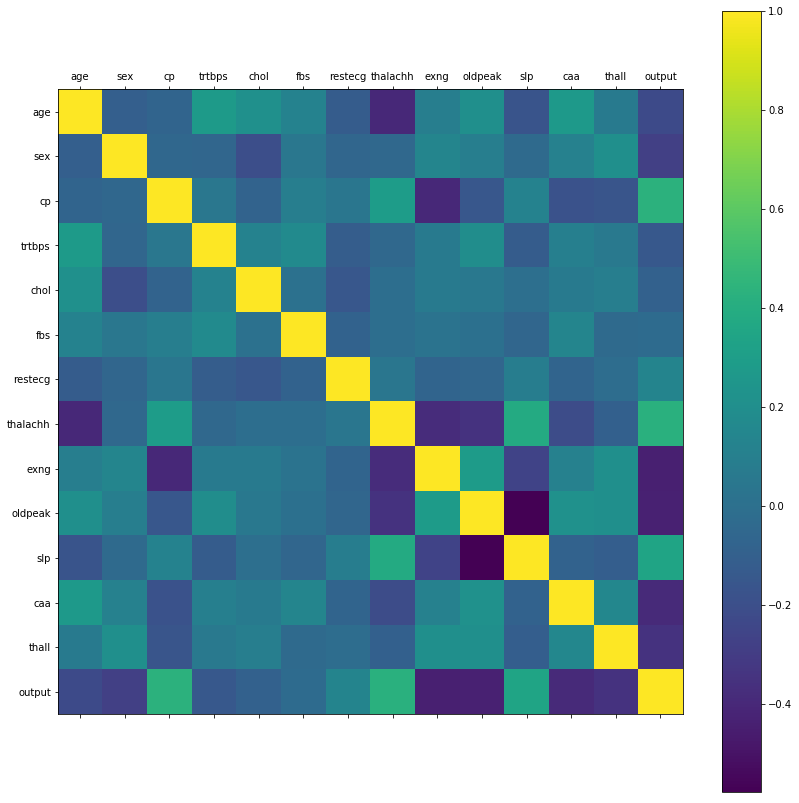

In [37]:
plt.rcParams['figure.figsize'] = 20, 14  #correlation matrix of the given features
plt.matshow(dt.corr())
plt.yticks(np.arange(dt.shape[1]), dt.columns)
plt.xticks(np.arange(dt.shape[1]), dt.columns)
plt.colorbar();

##### correlation of the chol and fbs feature are low or close to none. while other variables show significant relations

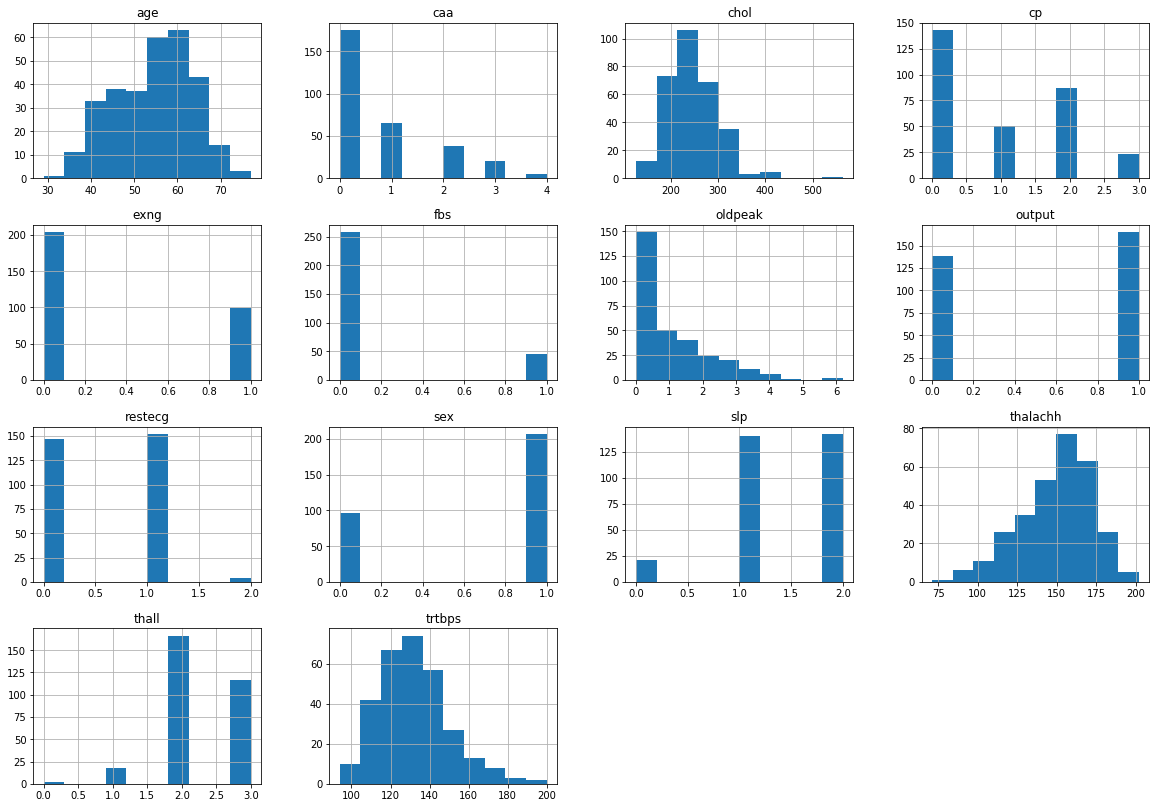

In [46]:
dt.hist();

##### feature and output are in different plots distributed along a set range.

## Train and Test 

In [38]:
from sklearn.model_selection import train_test_split

prediction = dt.drop("output",axis=1)
output = dt["output"]

X_train,X_test,Y_train,Y_test = train_test_split(prediction,output,test_size=0.20,random_state=0)

In [39]:
X_train.shape

(242, 13)

In [40]:
X_test.shape

(61, 13)

In [41]:
Y_train.shape

(242,)

In [42]:
Y_test.shape

(61,)

## Model Training

In [43]:
from sklearn.metrics import accuracy_score

### K - Nearest Neighbour

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [45]:
Y_pred_knn.shape

(61,)

In [46]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Support Vector Machine

In [47]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [48]:
Y_pred_svm.shape

(61,)

In [49]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [51]:
Y_pred_lr.shape

(61,)

In [52]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dtc = DecisionTreeClassifier(random_state=x)
    dtc.fit(X_train,Y_train)
    Y_pred_dtc = dtc.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dtc,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dtc = DecisionTreeClassifier(random_state=best_x)
dtc.fit(X_train,Y_train)
Y_pred_dtc = dtc.predict(X_test)

In [54]:
print(Y_pred_dtc.shape)

(61,)


In [55]:
score_dtc = round(accuracy_score(Y_pred_dtc,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dtc)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [57]:
Y_pred_nb.shape

(61,)

In [58]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [60]:
Y_pred_rf.shape

(61,)

In [61]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


### RESULTS

##### The accuracy score achieved using K-Nearest Neighbors = 67.21 %
##### The accuracy score achieved using Support Vector Machine = 81.97 %
##### The accuracy score achieved using Logistic Regression = 85.25 %
##### The accuracy score achieved using Decision Tree = 81.97 %
##### The accuracy score achieved using Naive Bayes = 85.25 %
##### The accuracy score achieved using Random Forest = 95.08 %

##### Therefore, based on accuracy of algorithm we can say that the random forest model is the most suitable algorithm and bes fit algorithm as it gives an accuracy of 95.08% compared to other algorithms

## GUI

In [64]:
from tkinter import *
window=Tk()
window.geometry("640x800")
window.title("Results")
window.configure(bg="black")
window.resizable(False, False)

r=Label(window,text = 'Results')
r.config(bg="black", fg="cyan", font=("Times", 24))

a=Message(window,text= "The Accuracy score achieved using Random Forest is  "+str(score_rf)+ "%")
a.place(x=20,y=40)
a.configure(bg="black", fg="cyan", font = ("Times",18, "bold"))


r.pack()
#a.pack()

window.mainloop()